In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams["figure.figsize"] = (15,8) #set size of plot
plt.rcParams.update({'font.size': 22})

In [3]:
os.chdir('/home/MA')

In [4]:
carbon_intensities = pd.read_excel('Data/Data-file-Europe-Power-Sector-2020.xlsx', sheet_name='Carbon intensities')
carbon_intensities.head()

,Area,Variable,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Austria,Carbon intensity (gCO2/kWh),158,176,168,213,197,189,183,169,...,164,121,109,94,110,98,107,102,99,83
1,Belgium,Carbon intensity (gCO2/kWh),270,257,263,266,271,275,253,242,...,194,208,190,205,227,172,177,207,184,192
2,Bulgaria,Carbon intensity (gCO2/kWh),476,525,483,536,536,505,497,602,...,583,525,481,476,486,462,497,425,424,352
3,Croatia,Carbon intensity (gCO2/kWh),292,305,363,389,288,305,314,396,...,306,290,206,178,212,210,195,135,172,164
4,Cyprus,Carbon intensity (gCO2/kWh),849,787,767,774,782,800,793,796,...,759,757,666,682,670,679,661,664,660,653


In [5]:
carbon_intensities.columns

Index([    'Area', 'Variable',       2000,       2001,       2002,       2003,
             2004,       2005,       2006,       2007,       2008,       2009,
             2010,       2011,       2012,       2013,       2014,       2015,
             2016,       2017,       2018,       2019,       2020],
      dtype='object')

In [6]:
carbon_intensities = carbon_intensities.drop(['Variable'], 1)

Drop values for 2020 since they are influenced by the covid pandemic and do not represent actual development

In [7]:
carbon_intensities = carbon_intensities.iloc[:, :-1]

**Define time horizon to be extrapolated HERE**

In [8]:
end_year = 2045

In [9]:
future_years = list(range(2020,end_year+1))

In [10]:
carbon_intensities[future_years] = np.NaN

In [11]:
carbon_intensities = carbon_intensities.transpose()
carbon_intensities.columns = carbon_intensities.iloc[0]
carbon_intensities.iloc[1:, :]
print(carbon_intensities['Spain'])

Area    Spain
2000      467
2001      416
2002      468
2003      412
2004      423
2005      439
2006      398
2007      411
2008      347
2009      317
2010      256
2011      319
2012      333
2013      270
2014      280
2015      318
2016      266
2017      305
2018      276
2019      228
2020      NaN
2021      NaN
2022      NaN
2023      NaN
2024      NaN
2025      NaN
2026      NaN
2027      NaN
2028      NaN
2029      NaN
2030      NaN
2031      NaN
2032      NaN
2033      NaN
2034      NaN
2035      NaN
2036      NaN
2037      NaN
2038      NaN
2039      NaN
2040      NaN
2041      NaN
2042      NaN
2043      NaN
2044      NaN
2045      NaN
Name: Spain, dtype: object


In [12]:
from io import StringIO
from scipy.optimize import curve_fit

df = pd.read_table(StringIO('''
        Spain
2000      467
2001      416
2002      468
2003      412
2004      423
2005      439
2006      398
2007      411
2008      347
2009      317
2010      256
2011      319
2012      333
2013      270
2014      280
2015      318
2016      266
2017      305
2018      276
2019      228
2020      NaN
2021      NaN
2022      NaN
2023      NaN
2024      NaN
2025      NaN
2026      NaN
2027      NaN
2028      NaN
2029      NaN
2030      NaN
2031      NaN
2032      NaN
2033      NaN
2034      NaN
2035      NaN
2036      NaN
2037      NaN
2038      NaN
2039      NaN
2040      NaN
2041      NaN
2042      NaN
2043      NaN
2044      NaN
2045      NaN'''), sep='\s+')

# Function to curve fit to the data
def func(x, c, d):
    return c * x + d

# Initial parameter guess, just to kick off the optimization
guess = (0.5, 0.5)

# Create copy of data to remove NaNs for curve fitting
fit_df = df.dropna()

# Place to store function parameters for each column
col_params = {}

# Curve fit each column
for col in fit_df.columns:
    # Get x & y
    x = fit_df.index.astype(float).values
    y = fit_df[col].values
    # Curve fit column and get curve parameters
    params = curve_fit(func, x, y, guess)
    # Store optimized parameters
    col_params[col] = params[0]

# Extrapolate each column
for col in df.columns:
    # Get the index values for NaNs in the column
    x = df[pd.isnull(df[col])].index.astype(float).values
    # Extrapolate those points with the fitted function
    df[col][x] = func(x, *col_params[col])

# Display result
print('Extrapolated data:')
print(df)
print

print('Data was extrapolated with these column functions:')
for col in col_params:
    print('f_{}(x) = {:0.4f} x + {:0.4f}'.format(col, *col_params[col]))

Extrapolated data:
           Spain
2000  467.000000
2001  416.000000
2002  468.000000
2003  412.000000
2004  423.000000
2005  439.000000
2006  398.000000
2007  411.000000
2008  347.000000
2009  317.000000
2010  256.000000
2011  319.000000
2012  333.000000
2013  270.000000
2014  280.000000
2015  318.000000
2016  266.000000
2017  305.000000
2018  276.000000
2019  228.000000
2020  226.810526
2021  215.321053
2022  203.831579
2023  192.342105
2024  180.852632
2025  169.363158
2026  157.873684
2027  146.384211
2028  134.894737
2029  123.405263
2030  111.915789
2031  100.426316
2032   88.936842
2033   77.447368
2034   65.957895
2035   54.468421
2036   42.978947
2037   31.489474
2038   20.000000
2039    8.510526
2040   -2.978947
2041  -14.468421
2042  -25.957895
2043  -37.447368
2044  -48.936842
2045  -60.426316
Data was extrapolated with these column functions:
f_Spain(x) = -11.4895 x + 23435.5474


In [13]:
df[df<0]=0

In [28]:
df.loc[:'2020', :]

,Spain
2000,467.000000
2001,416.000000
2002,468.000000
2003,412.000000
2004,423.000000
2005,439.000000
2006,398.000000
2007,411.000000
2008,347.000000
2009,317.000000


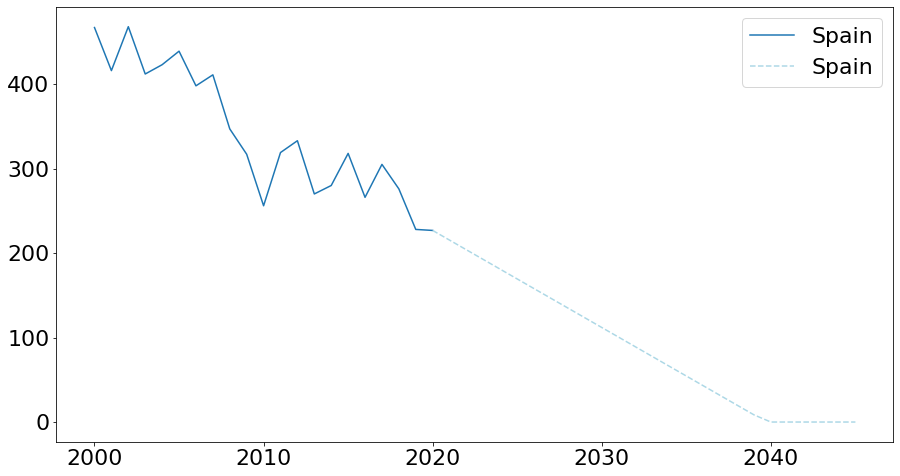

In [33]:
ax = df.loc[:'2020', :].plot();
df.loc['2020':, :].plot(ax=ax, linestyle = '--', color = 'lightblue');

In [15]:
future_average_Spain = df.tail(len(future_years)).mean()

In [18]:
future_average_Spain

Spain    90.508097
dtype: float64